### P5: Identificar fraude no e-mail da Enron

Daniel Senna Panizzo - Udacity - 13/02/2018

#### 1. Resumo

Em 2000, Enron era uma das maiores empresas dos Estados Unidos. Já em 2002, ela colapsou e quebrou devido a uma fraude que envolveu grande parte da corporação. Resultando em uma investigação federal, muitos dados que são normalmente confidenciais, se tornaram públicos, incluindo dezenas de milhares de e-mails e detalhes financeiros para os executivos dos mais altos níveis da empresa. 

Neste projeto, utilizaremos técnicas de aprendizado de máquina para propor um modelo preditivo que visará determinar se um funcionário é ou não um funcionário de interesse (POI). Um funcionário de interesse é um funcionário que participou do escândalo da empresa Enron. Para executar este projeto, foram combinados os dados financeiros e de e-mails dos funcionários investigados neste caso de fraude, o que significa que eles foram indiciados, fecharam acordos com o governo, ou testemunharam em troca de imunidade no processo.

#### 2. Conjunto de Dados

O conjunto de dados disponibilizado é um dicionário (chave-valor). A chave do dicionário é o nome da pessoa, e o valor é outro dicionário, que contém o nome de todos os atributos e seus valores para aquela pessoa. Os atributos nos dados possuem basicamente três tipos: atributos financeiros, de email e rótulos POI (pessoa de interesse).



ATRIBUTO                  | TIPO       | DESCRIÇÃO 
------------------------- | -----------| ----------------------------------------------------------
email_address             | E-mail     | Endereço de e-mail
from_messages             | E-mail     | Quantidade de e-mail recebidos
from_poi_to_this_person   | E-mail     | Quantidade de e-mails recebido de POI's
from_this_person_to_poi   | E-mail     | Quantidade de e-mails enviados para POI's
shared_receipt_with_poi   | E-mail     | Quantidade de e-mails recebidos junto com POI's
to_messages               | E-mail     | Quantidade de e-mails enviados
bonus                     | Financeiro | Valor de bonus recebido
deferral_payments         | Financeiro | Valor de pagamentos adiantados
deferred_income           | Financeiro | Valor de renda deferida
director_fees             | Financeiro | Valor de taxa de Diretoria
exercised_stock_options   | Financeiro | Valor de opção de ação exercida
expenses                  | Financeiro | Valor de despesas
loan_advances             | Financeiro | Valor de empréstimo adiantado
long_term_incentive       | Financeiro | Valor do incentivo por contribuição 
other                     | Financeiro | Outros valores recebidos
restricted_stock          | Financeiro | Valor de ações restritas
restricted_stock_deferred | Financeiro | Valor de ações restritas deferidas
salary                    | Financeiro | Valor do salário
total_payments            | Financeiro | Valor total de pagamentos
total_stock_value         | Financeiro | Valor total das ações
poi                       | Rótulo     | Booleano que identifica um POI

In [1]:
#!/usr/bin/python

### Load libraries
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data, test_classifier

import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

### SKLearn Libraries
# Preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

### Classification libraries
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Validation libraries
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.model_selection import PredefinedSplit

# Plot charts 
%pylab inline

# Use two decimals places when describing dataset
pd.set_option('display.float_format', lambda x: "{0:.2f}".format(x) )

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#### 3. Explorando os Dados

Pela descrição do nosso conjunto de dados, já sabemos que ele é composto por dois tipos de atributos (e-mail e financeiro). Iremos preparar uma lista com cada tipo de atributo para explorarmos as relações com nosso rótulo (poi) mais adiante.

In [2]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### List of financial features with poi label
financial_features_list = ['poi', 'bonus', 'deferral_payments', 'deferred_income', 'director_fees'
                          ,'exercised_stock_options', 'expenses', 'loan_advances'
                          ,'long_term_incentive', 'other', 'restricted_stock'
                          ,'restricted_stock_deferred', 'salary', 'total_payments', 'total_stock_value']

### List of e-mail features with poi label
email_features_list = ['poi', 'from_messages', 'from_poi_to_this_person'
                      ,'from_this_person_to_poi', 'shared_receipt_with_poi', 'to_messages']

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

Vamos dar uma olhada em uma amostra do dicionário disponibilizado para termos uma ideia dos dados que iremos explorar e a quantidade total de atributos.

In [3]:
### Dictionary example
pp.pprint(data_dict['SKILLING JEFFREY K'])
print '\nTotal number of features: ' + str(len(data_dict['SKILLING JEFFREY K']))

{'bonus': 5600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'jeff.skilling@enron.com',
 'exercised_stock_options': 19250000,
 'expenses': 29336,
 'from_messages': 108,
 'from_poi_to_this_person': 88,
 'from_this_person_to_poi': 30,
 'loan_advances': 'NaN',
 'long_term_incentive': 1920000,
 'other': 22122,
 'poi': True,
 'restricted_stock': 6843672,
 'restricted_stock_deferred': 'NaN',
 'salary': 1111258,
 'shared_receipt_with_poi': 2042,
 'to_messages': 3627,
 'total_payments': 8682716,
 'total_stock_value': 26093672}

Total number of features: 21


Para facilitar a nossa exploração dos dados, iremos transformar o dicionário em DataFrame. Neste cenário, executaremos em seguida os seguintes passos:
- Com exceção do campo email_address, os demais campos são numéricos. Por se tratar de um campo redundante com o índice do dicionário (nome da pessoa), podemos removê-lo;
- Temos vários campos com valores nulos (NaN), será necessário tratá-los;
- Transformar os campos numéricos para float, para facilitar futuros cálculos;

In [4]:
### Transform dictionary to dataframe
df = pd.DataFrame.from_dict(data_dict, orient='index')

### Remove e-mail column
df.drop('email_address', axis=1, inplace=True)

### Transform dataframe datatypes
df = df.replace('NaN', np.nan)
df = df.astype('float')

Vamos dar uma olhada no resultado da nossa transformação de dicionário em DataFrame.

In [5]:
### Show dataframe sample
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
ALLEN PHILLIP K,201955.00,2902.00,2869717.00,4484442.00,1729541.00,4175000.00,126027.00,1407.00,-126027.00,1729541.00,13868.00,nan,2195.00,152.00,65.00,0.00,nan,-3081055.00,304805.00,47.00
BADUM JAMES P,nan,nan,178980.00,182466.00,257817.00,nan,nan,nan,nan,257817.00,3486.00,nan,nan,nan,nan,0.00,nan,nan,nan,nan
BANNANTINE JAMES M,477.00,566.00,nan,916197.00,4046157.00,nan,1757552.00,465.00,-560222.00,5243487.00,56301.00,nan,29.00,864523.00,0.00,0.00,nan,-5104.00,nan,39.00
BAXTER JOHN C,267102.00,nan,1295738.00,5634343.00,6680544.00,1200000.00,3942714.00,nan,nan,10623258.00,11200.00,nan,nan,2660303.00,nan,0.00,nan,-1386055.00,1586055.00,nan
BAY FRANKLIN R,239671.00,nan,260455.00,827696.00,nan,400000.00,145796.00,nan,-82782.00,63014.00,129142.00,nan,nan,69.00,nan,0.00,nan,-201641.00,nan,nan


Agora uma olhada nas estatísticas descritivas dos nossos dados.

In [6]:
### Show dataframe descriptive statistics
df.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
count,95.00,86.00,39.00,125.00,102.00,82.00,110.00,86.00,18.00,126.00,95.00,4.00,86.00,93.00,86.00,146.00,17.00,49.00,66.00,86.00
mean,562194.29,2073.86,1642674.15,5081526.49,5987053.77,2374234.61,2321741.14,1176.47,166410.56,6773957.45,108728.92,41962500.00,608.79,919064.97,41.23,0.12,166804.88,-1140475.14,1470361.45,64.90
std,2716369.15,2582.70,5161929.97,29061716.40,31062006.57,10713327.97,12518278.18,1178.32,4201494.31,38957772.73,533534.81,47083208.70,1841.03,4589252.91,100.07,0.33,319891.41,4025406.38,5942759.32,86.98
min,477.00,57.00,-102500.00,148.00,3285.00,70000.00,-2604490.00,2.00,-7576788.00,-44093.00,148.00,400000.00,12.00,2.00,0.00,0.00,3285.00,-27992891.00,69223.00,0.00
25%,211816.00,541.25,81573.00,394475.00,527886.25,431250.00,254018.00,249.75,-389621.75,494510.25,22614.00,1600000.00,22.75,1215.00,1.00,0.00,98784.00,-694862.00,281250.00,10.00
50%,259996.00,1211.00,227449.00,1101393.00,1310813.50,769375.00,451740.00,740.50,-146975.00,1102872.50,46950.00,41762500.00,41.00,52382.00,8.00,0.00,108579.00,-159792.00,442035.00,35.00
75%,312117.00,2634.75,1002671.50,2093263.00,2547724.00,1200000.00,1002369.75,1888.25,-75009.75,2949846.75,79952.50,82125000.00,145.50,362096.00,24.75,0.00,113784.00,-38346.00,938672.00,72.25
max,26704229.00,15149.00,32083396.00,309886585.00,311764000.00,97343619.00,130322299.00,5521.00,15456290.00,434509511.00,5235198.00,83925000.00,14368.00,42667589.00,609.00,1.00,1398517.00,-833.00,48521928.00,528.00


Podemos observar que temos alguns atributos com valores negativos, como deferral_payments e restricted_stock. Também temos atributos com valores máximos que são muito superiores à média.

Vamos checar o tamanho do nosso conjunto de dados.

In [7]:
### Dataframe and Dictionary size
print 'Dictionary: ' + str(len(data_dict))
print 'Dataframe: ' + str(len(df))

Dictionary: 146
Dataframe: 146


São apenas 146 registros, então qualquer remoção de registro deve ser realizada com muito cuidado para não perdermos informações importantes.

Verifiquemos a quantidade de registros nulos em cada um dos atributos.

In [8]:
### Number of NaN values 
df.isnull().sum()

salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
exercised_stock_options       44
bonus                         64
restricted_stock              36
shared_receipt_with_poi       60
restricted_stock_deferred    128
total_stock_value             20
expenses                      51
loan_advances                142
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
director_fees                129
deferred_income               97
long_term_incentive           80
from_poi_to_this_person       60
dtype: int64

Com exceção do rótulo, todos os campos possuem valores nulos. Devemos dar uma atenção especial aos atributos "deferral_payments", "restricted_stock_deferred", "loan_advances" e "director_fees", que possuem muitos registros nulos e podem enviesar nosso modelo.

Vamos explorar a distribuição de pois non-pois na nosso conjunto de dados.

0.00    128
1.00     18
Name: poi, dtype: int64

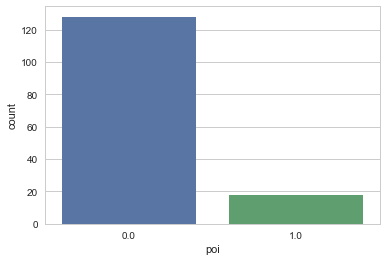

In [9]:
### Number os poi and non-poi
sns.countplot(df['poi'],label="Count")
df['poi'].value_counts()

In [10]:
### Number of poi and non-poi per feature
df.groupby(['poi']).count()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
poi,,,,,,,,,,,,,,,,,,,
0.00,78,72,34,107,90,66,93,72,18,108,77,3,72,75,72,17,38,54,72
1.00,17,14,5,18,12,16,17,14,0,18,18,1,14,18,14,0,11,12,14


Dos 146 registros, apenas 18 são pois, representando cerca de 14% total de registros. Sendo que para os atributos "restricted_stock_deferred" e "director_fees" não existe nenhum registro de poi.

#### 4. Tratamento dos Dados

Nas estatísticas descritivas, verificamos que os valores máximos de vários atributos estão muito acima da média. Vamos analisá-los visualmente e identificá-los, começando pelos atributos financeiros.

C:\ProgramData\Anaconda2\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


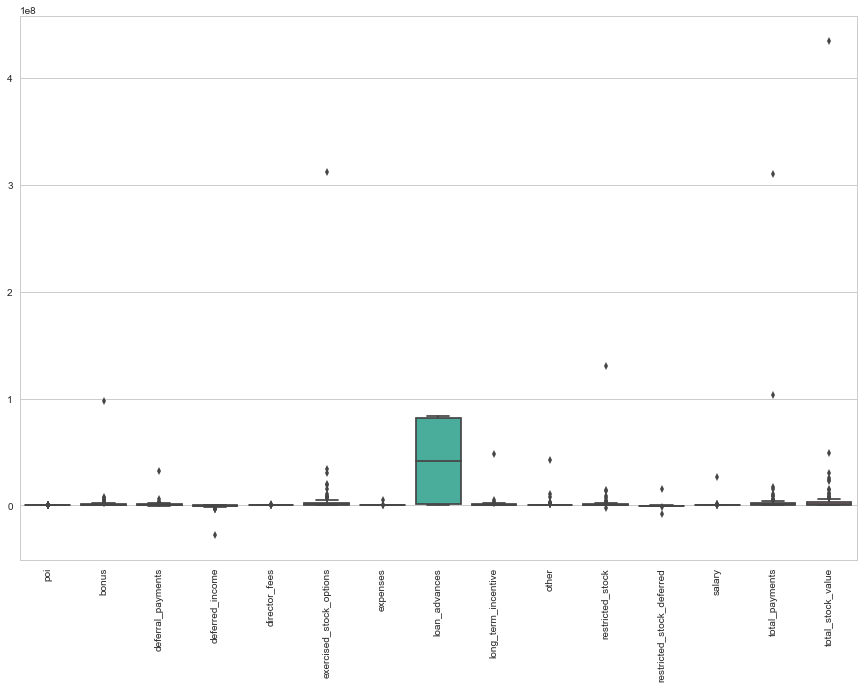

In [11]:
### Task 2: Remove outliers

### Exploring outliers   
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x=df[financial_features_list])

In [12]:
df[financial_features_list].idxmax()

poi                            BELDEN TIMOTHY N
bonus                                     TOTAL
deferral_payments                         TOTAL
deferred_income              BOWEN JR RAYMOND M
director_fees                             TOTAL
exercised_stock_options                   TOTAL
expenses                                  TOTAL
loan_advances                             TOTAL
long_term_incentive                       TOTAL
other                                     TOTAL
restricted_stock                          TOTAL
restricted_stock_deferred      BHATNAGAR SANJAY
salary                                    TOTAL
total_payments                            TOTAL
total_stock_value                         TOTAL
dtype: object

Pelo diagrama de caixa acima, podemos observar que existem diversos ouliers e que a maioria deles é referente ao registro "TOTAL". Este é um registro agregado que não deve compor nosso conjunto de dados. Portanto, iremos removê-lo tanto do dicionário quando do DataFrame para continuarmos nossa análise.

In [13]:
data_dict.pop('TOTAL',0)
df = df.drop(['TOTAL'])

Analisemos novamente os atributos financeiros, desta vez, sem o registro "TOTAL".

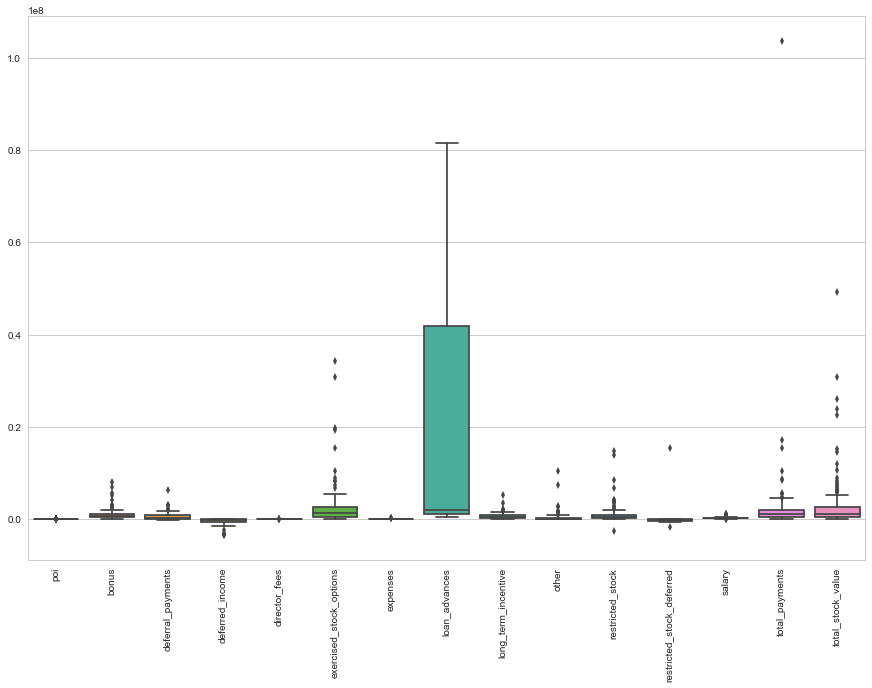

In [14]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x=df[financial_features_list])

In [15]:
df[financial_features_list].idxmax()

poi                            BELDEN TIMOTHY N
bonus                           LAVORATO JOHN J
deferral_payments                FREVERT MARK A
deferred_income              BOWEN JR RAYMOND M
director_fees                  BHATNAGAR SANJAY
exercised_stock_options           LAY KENNETH L
expenses                       MCCLELLAN GEORGE
loan_advances                     LAY KENNETH L
long_term_incentive             MARTIN AMANDA K
other                             LAY KENNETH L
restricted_stock                  LAY KENNETH L
restricted_stock_deferred      BHATNAGAR SANJAY
salary                       SKILLING JEFFREY K
total_payments                    LAY KENNETH L
total_stock_value                 LAY KENNETH L
dtype: object

Apesar de ainda contarmos dom diversos outliers, a maioria deles é referente à pessoas de interesse, como "SKILLING JEFFREY K" e "LAY KENNETH L", membros da diretoria diretamente ligados à fraude financeira da ENRON. Neste caso não podemos removê-los por tratar-se de informações importantes para o nosso modelo.

Passemos para a análise dos atributos de e-mail.

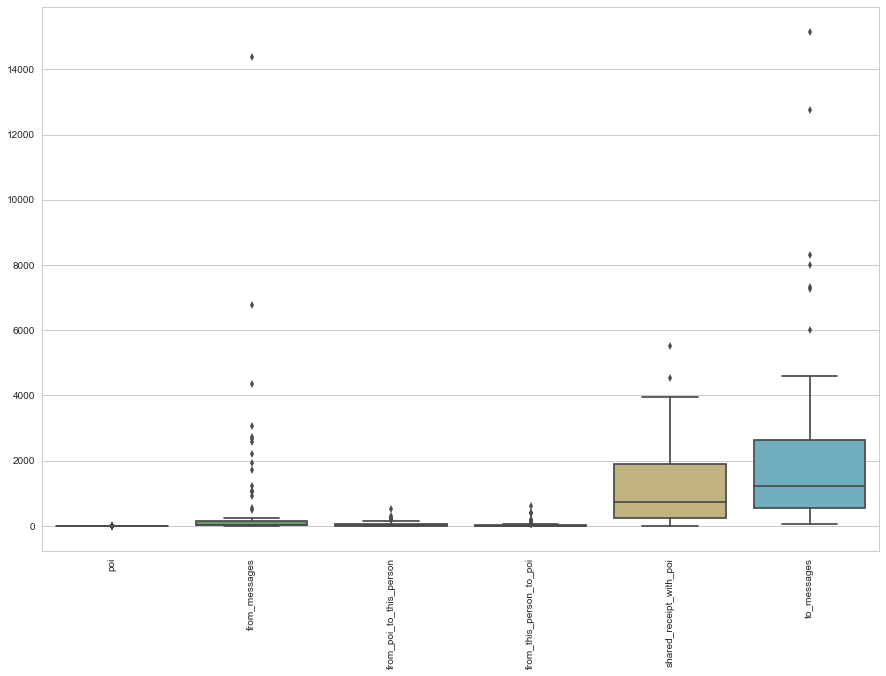

In [16]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x=df[email_features_list])

In [17]:
df[email_features_list].idxmax()

poi                           BELDEN TIMOTHY N
from_messages              KAMINSKI WINCENTY J
from_poi_to_this_person        LAVORATO JOHN J
from_this_person_to_poi       DELAINEY DAVID W
shared_receipt_with_poi       BELDEN TIMOTHY N
to_messages                  SHAPIRO RICHARD S
dtype: object

Podemos observar que existem vários outliers, mas nada fora do normal. Iremos mantê-los como estão.

Passemos agora para a análise de correlação dos atributos de e-mail.

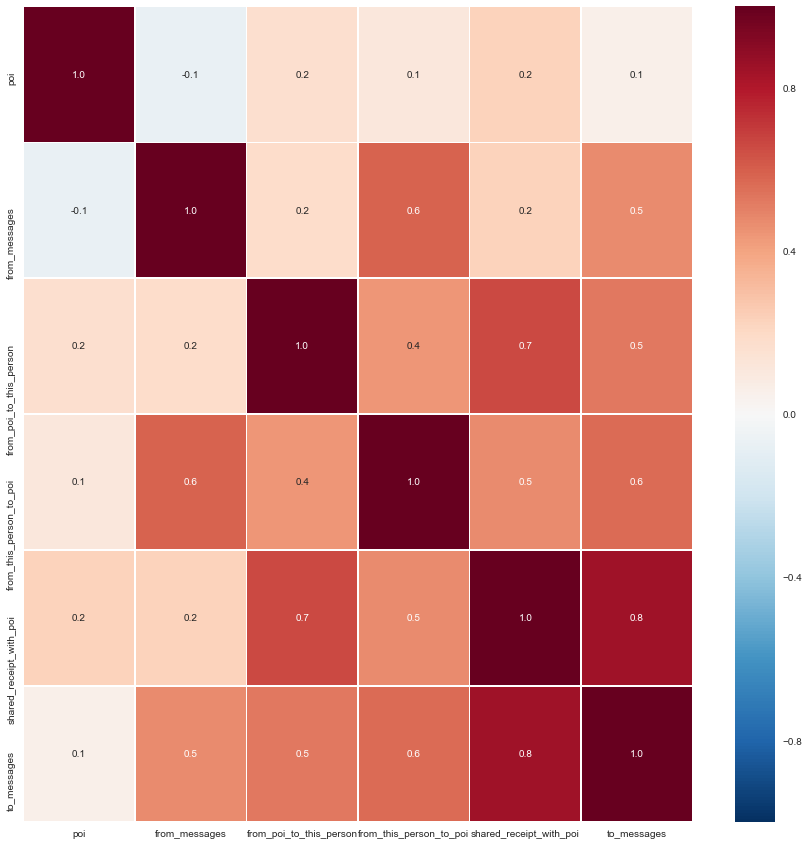

In [18]:
### Plot e-mail features heatmap correlation  
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df[email_features_list].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

À primeira vista, os e-mails possuem baixa correlação com os pois. Sendo as mais fortes as correalções com os atributos "from_poi_to_this_person" e "shared_receipt_with_poi".

Vamos prosseguir com a análise de correlação dos atributos financeiros.

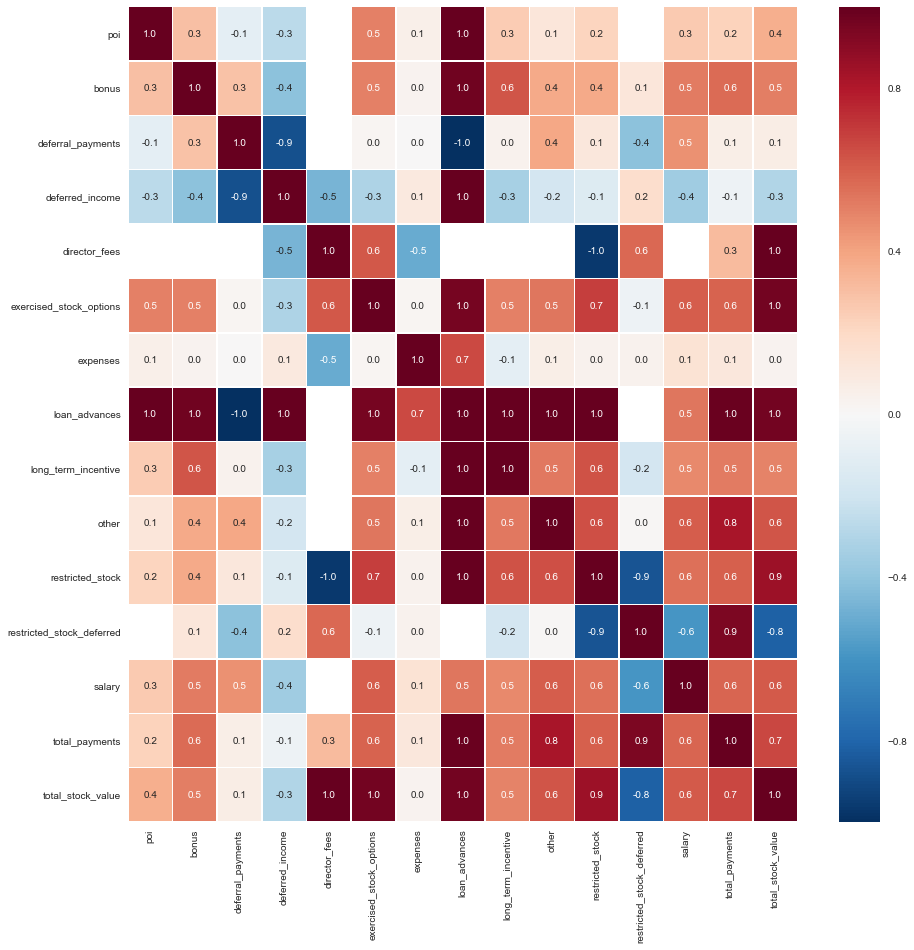

In [19]:
### Plot financial features heatmap correlation  
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df[financial_features_list].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Aqui, três atributos chamam a atenção. Os campos "director_fees" e "restricted_stock_deferred" não possuem correlação com pois. Além destes, o campo "loan_advances" possui correlação completa com a maioria dos atributos e pode enviesar o modelo. Como estes três atributos também são os que mais possuem registros nulos, iremos removê-los do conjunto de dados.

Os atributos que serão removidos do conjunto de dados são:
- director_fees
- restricted_stock_deferred
- loan_advances
- email_address

In [20]:
### Remove director_fees, restricted_stock_deferred, other, expenses, loan_advances
### Updating feature list
features_list = ['poi', 'bonus','deferral_payments', 'deferred_income','exercised_stock_options'
                ,'expenses','long_term_incentive','other','restricted_stock','salary'
                ,'total_payments','total_stock_value','from_messages','from_poi_to_this_person'
                ,'from_this_person_to_poi','shared_receipt_with_poi','to_messages']

drop_list = ['director_fees', 'restricted_stock_deferred', 'email_address', 'loan_advances']

In [21]:
### Remove features from dictionary
for person in data_dict:
    for feature in data_dict[person].keys():
        if feature in drop_list:
            del data_dict[person][feature]

Mais uma olhada em uma amostra do dicionário de dados com os atributos removidos.

In [22]:
pp.pprint(data_dict['SKILLING JEFFREY K'])

{'bonus': 5600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'exercised_stock_options': 19250000,
 'expenses': 29336,
 'from_messages': 108,
 'from_poi_to_this_person': 88,
 'from_this_person_to_poi': 30,
 'long_term_incentive': 1920000,
 'other': 22122,
 'poi': True,
 'restricted_stock': 6843672,
 'salary': 1111258,
 'shared_receipt_with_poi': 2042,
 'to_messages': 3627,
 'total_payments': 8682716,
 'total_stock_value': 26093672}


Abaixo a matriz de correlação com os atributos de e-mail e financeiros selecionados.

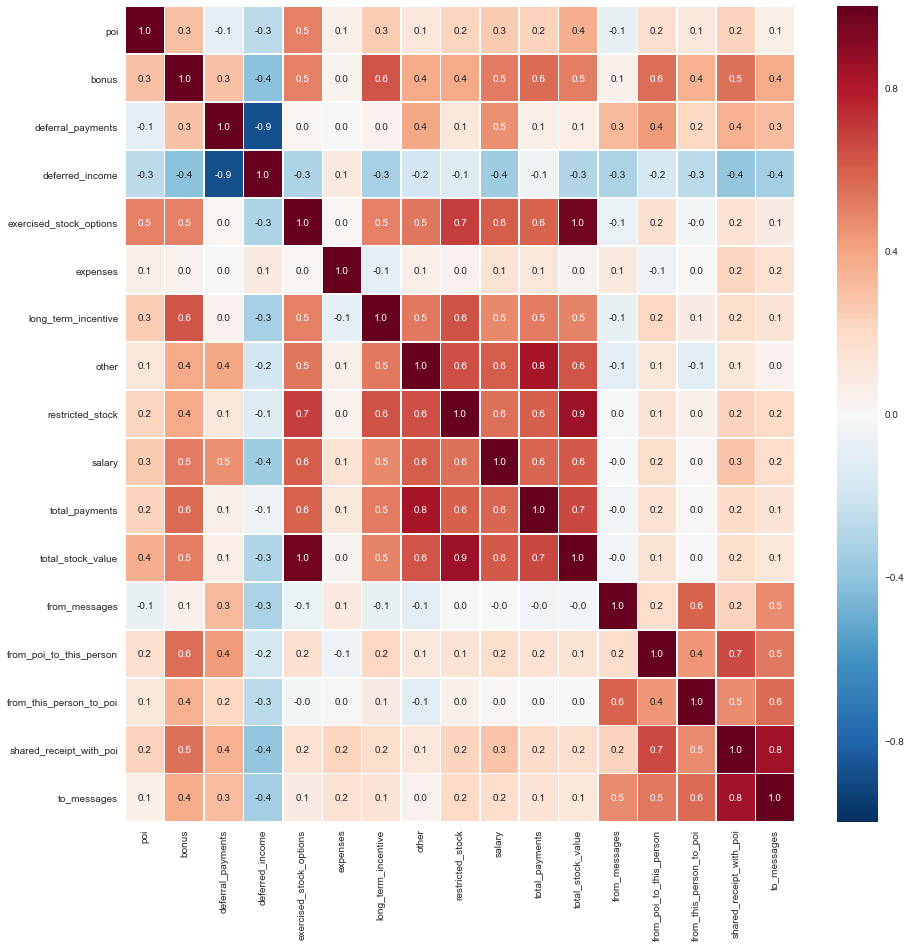

In [23]:
### Plot heatmap correlation  
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df[features_list].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Para finalizar o tratamento dos dados, vamos criar mais quatro atributos que podem nos ajudar na construção do nosso modelo preditivo.

ATRIBUTO                  | TIPO       | DESCRIÇÃO 
------------------------- | -----------| ----------------------------------------------------------
perc_exercised_stock      | Financeiro | Percentual de ações exercidas em relação ao valor total de ações
perc_bonus                | Financeiro | Percentual de bônus recebido em relação ao total de pagamentos
perc_message_from_poi     | E-mail     | Percentual de mensagens recebidas de POI's em relação ao total de mensagens recebidas
perc_message_to_poi       | E-mail     | Percentual de mensagens enviadas para POI's em relação ao total de mensagens enviadas

Optei por criar estes atributos para verificar a proporcionalidade de certos atributos em relação ao total. Por exemplo, uma pessoa que enviou muitos e-mails para POIs, não necessariamente tem uma estreita relação com eles, visto que representaria um pequeno percentual do total enviado. Assim como uma pessoa que enviou poucos e-mails, mas todos para POIs, pode indicar uma relação próxima entre estas pessoas.

In [24]:
### Add features on dictionary
for person in data_dict:
    
    ### Add perc_exercised_stock
    if (data_dict[person]['exercised_stock_options'] == 'NaN' or data_dict[person]['total_stock_value'] == 'NaN'):
        data_dict[person]['perc_exercised_stock'] = 0
    else:
        data_dict[person]['perc_exercised_stock'] = ( float(data_dict[person]['exercised_stock_options'])
                                                    / float(data_dict[person]['total_stock_value'])) * 100.0

    ### Add perc_bonus
    if (data_dict[person]['bonus'] == 'NaN' or data_dict[person]['total_payments'] == 'NaN'):
        data_dict[person]['perc_bonus'] = 0
    else:
        data_dict[person]['perc_bonus'] = ( float(data_dict[person]['bonus'])
                                          / float(data_dict[person]['total_payments'])) * 100.0
    
    ### Add perc_message_from_poi
    if (data_dict[person]['from_poi_to_this_person'] == 'NaN' or data_dict[person]['from_messages'] == 'NaN'):
        data_dict[person]['perc_message_from_poi'] = 0
    else:
        data_dict[person]['perc_message_from_poi'] = ( float(data_dict[person]['from_poi_to_this_person'])
                                                     / float( data_dict[person]['from_messages']
                                                            + data_dict[person]['from_poi_to_this_person'])) * 100.0

    ### Add perc_message_to_poi
    if (data_dict[person]['from_this_person_to_poi'] == 'NaN' or data_dict[person]['to_messages'] == 'NaN'):
        data_dict[person]['perc_message_to_poi'] = 0
    else:
        data_dict[person]['perc_message_to_poi'] = ( float(data_dict[person]['from_this_person_to_poi'])
                                                   / float( data_dict[person]['to_messages']
                                                          + data_dict[person]['from_this_person_to_poi'])) * 100.0   

### Add features on dataframe
df['perc_exercised_stock'] = ( df['exercised_stock_options'].fillna(0)
                             / df['total_stock_value'].fillna(1)) * 100
                              
df['perc_bonus'] = ( df['bonus'].fillna(0)
                   / df['total_payments'].fillna(1)) * 100

df['perc_message_from_poi'] = ( df['from_poi_to_this_person'].fillna(0)
                              / (df['from_messages'].fillna(1)
                               + df['from_poi_to_this_person'].fillna(0))) * 100

df['perc_message_to_poi'] = ( df['from_this_person_to_poi'].fillna(0)
                            / (df['to_messages'].fillna(1)
                             + df['from_this_person_to_poi'].fillna(0))) * 100

In [25]:
### Updating features list
features_list.extend(['perc_exercised_stock'
                     ,'perc_bonus'
                     ,'perc_message_from_poi'
                     ,'perc_message_to_poi'])

Por fim, uma última olhada na nossa matriz de correlação.

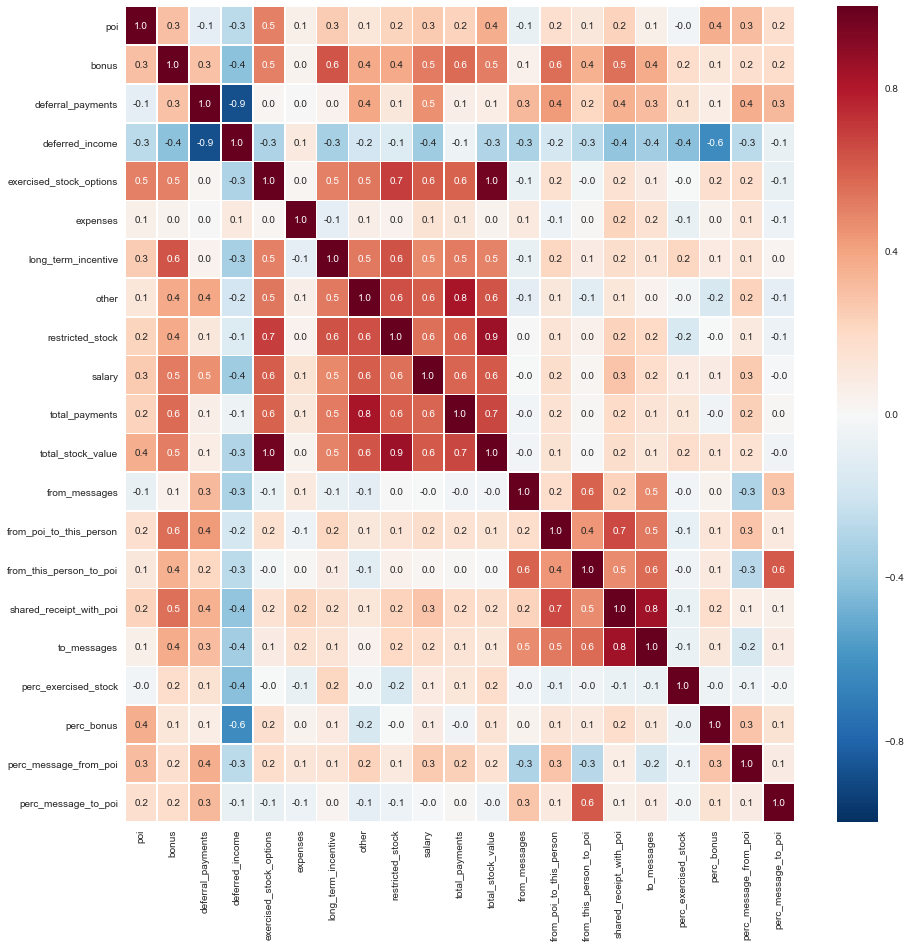

In [26]:
### Plot heatmap correlation  
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df[features_list].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Podemos observar que os atributos "perc_bonus" e "perc_message_from_poi" atingiram boas correlações com pois e apresentaram melhor correlação que seus atributos originais.

#### 5. Modelos, Treino, Validação e Teste

Com o conjunto de dados preparado, escolhemos três modelos preditivos para os nossos testes. Seguindo a lógica do [*cheat sheet*](http://scikit-learn.org/stable/_static/ml_map.png) de algoritmos do SKLearn, podemos utilizar modelos de **classificação**, como:

- Support Vector Machines (Linear)
- Nearest Neighbor
- Ensemble Classifiers (ex: Random Forest)

Buscando medir o impacto dos atributos criados anteriormente, nosso conjunto de dados será dividido em dois. Um com atributos originais e outro com o acréscimo dos novos atributos.

In [27]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.

my_dataset = data_dict

### Original and new features list
org_features_list = features_list[:17]
new_features_list = features_list

### Extract original features and labels from dataset for local testing
data = featureFormat(my_dataset, org_features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Extract features and labels from dataset with new features for local testing
new_data = featureFormat(my_dataset, new_features_list, sort_keys = True)
new_labels, new_features = targetFeatureSplit(new_data)

### Create train and test datasets with original features
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Create train and test datasets with new features
new_features_train, new_features_test, new_labels_train, new_labels_test = \
    train_test_split(new_features, new_labels, test_size=0.3, random_state=42)
    
### Features List without poi 
train_features_list = org_features_list[1:]
new_train_features_list = new_features_list[1:]


Visto que nossos dados possuem atributos com diferentes tipos de medida (valores monetários e quantidade de e-mails) e que nossos modelos preditivos assumem uma distribuição normal para serem aplicados, faremos um ajuste na escala dos atributos normalizando-os.

In [28]:
### Scale Features
scaler = StandardScaler()

### Scale train and test datasets with original features
scaler.fit(features_train)
features_train_scaled = scaler.transform(features_train)
features_test_scaled = scaler.transform(features_test)

### Scale train and test datasets with new features
scaler.fit(new_features_train)
new_features_train_scaled = scaler.transform(new_features_train)
new_features_test_scaled = scaler.transform(new_features_test)

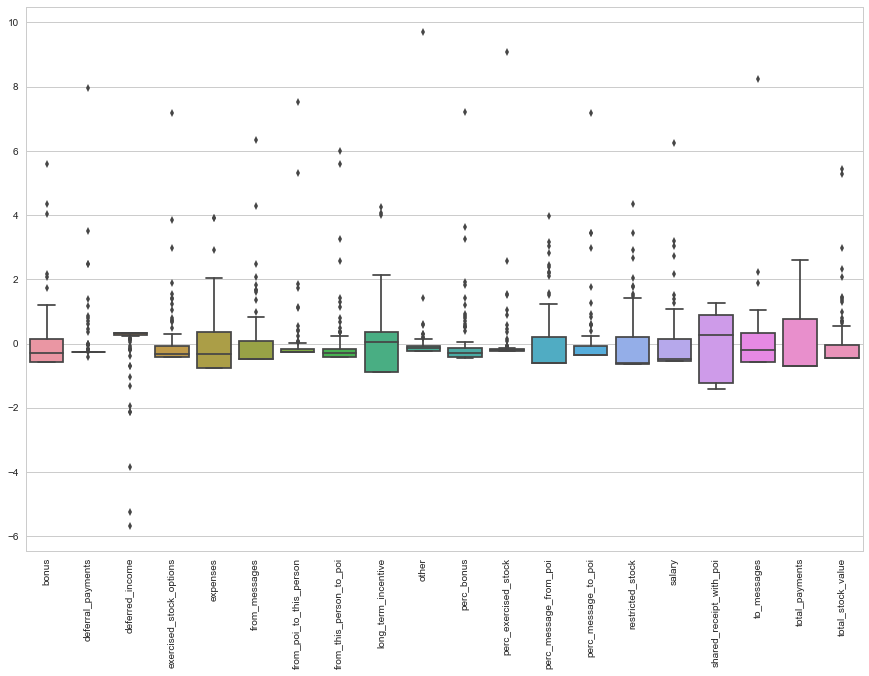

In [29]:
scaled_df = pd.DataFrame(new_features_train_scaled, columns = sort(new_train_features_list))
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x=scaled_df)

Para validar nossos modelos, avaliar a acurácia não será o suficiente, pois, para casos de identificação de fraude como o da Enron, podemos ter a falsa sensação de termos obtido um bom modelo preditivo se olharmos apenas para este indicador.

O conjunto de dados da Enron é composta por 12% de POIs, portanto, se classificarmos todos as pessoas como não-POI (verdadeiro negativo) nosso modelo já apresentaria uma acurácia de 88%. Como nosso principal objetivo é em identificar os POIs (verdadeiros positivos), utilizaremos o seguinte conjunto de indicadores para validar nossos modelos:

**Acurácia**: Percentual total de predições corretas, ou seja, quantidade de pessoas classificadas corretamente como POIs e não-POIs do total de pessoas na nossa amostra.
- (tp + tn) / (tp + tn + fp + fn) 

**Precisão**: Percentual de verdadeiros positivos do total de verdadeiros e falsos positivos, ou seja, quantidade de pessoas classificadas corretamente como POIs do total de pessoas classificadas corretamente como POIs somado com os não-POIs classificados incorretamente como POIs. 
- tp / (tp + fp)

**Revocação**: Percentual de verdadeiros positivos do total de verdadeiros positivos e falsos negativos, ou seja, percentual de pessoas que foram classificadas corretamente como POIs do total de pessoas classificadas corretamente como POIs somado com os POIs classificados incorretamente como não-POIs.
- tp / (tp + fn)

**F1**: Combinação de precisão e revocação.
- 2 x ((precis x revoc) / (precis + revoc))

Nosso meta é alcançar uma pontuação mínima de 0.3 para precisão e revocação. Para isso, utilizaremos o F1 como parâmetro de pontuação durante a seleção de atributos e na otimização dos parâmetros dos modelos. Esta otimização dos parâmetros é visto como um ajuste fino nos modelos que nos auxilia a generalizar diferentes padrões nos dados. Para nos ajudar neste ajuste, utilizaremos a função GridSearchCV, uma função que testa diferentes combinações de parâmetros que fornecemos para um modelo e retorna a combinação de parâmetros que atingiu a melhor pontuação. 

Durante a validação dos modelos, nossos dados são separados em dois conjuntos utilizando a função **train_test_split**. Sendo um conjunto para treino dos modelos (contendo 70% dos dados) e outro para validação dos modelos (contendo 30% dos dados). Com estes conjuntos podemos verificar a performance dos nossos indicadores antes e após a seleção de atributos e ajuste de parâmetros dos modelos.

Após o ajuste dos parâmetros, os modelos devem ser testados com um conjunto de dados separado e independente do de treino e validação, para garantir que não tenhamos resultados enviesados. No entanto, devido ao pequeno tamanho do nosso conjunto de dados, este conjunto de teste foi criado utilizando a função **StratifiedShuffleSplit**. Esta função foi configurada para gerar 1000 variações de conjuntos de treino e teste a partir dos dados originais. A performance final do nosso modelo será verificada pelos resultados obtidos de todas estas combinações de treino e teste.

In [30]:
### Function for validation
def clf_validation(labels_test, pred):
    ac = accuracy_score(labels_test,pred)
    cm = confusion_matrix(labels_test, pred, labels=range(2))
    ps = precision_score(labels_test, pred, average='binary')
    rs = recall_score(labels_test, pred, average='binary')
    f1 = f1_score(labels_test, pred, average='binary')
    print ('Accuracy: ', ac)
    print ('Presicion: ', ps)
    print ('Recall: ', rs)
    print ('F1: ', f1)
    sns.heatmap(cm,annot=True,fmt="d")

### Scorer for F1 with binary option
f1_binary = make_scorer(f1_score, average='binary')

**MODELO: SUPPORT VECTOR MACHINES**

O primeiro modelo que testaremos é o Support Vector Machines. Vamos verificar a pontuação do modelo com o conjunto de dados com atributos originais e com novos atributos.

('Accuracy: ', 0.88636363636363635)
('Presicion: ', 0.5)
('Recall: ', 0.40000000000000002)
('F1: ', 0.44444444444444448)


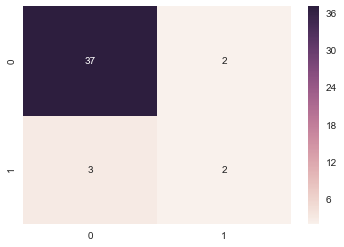

In [31]:
# Support Vector Machines - Test 01 - Original features
clf =SVC(kernel = 'linear')
clf.fit(features_train_scaled , labels_train)
pred = clf.predict(features_test_scaled)   
clf_validation(labels_test, pred)

('Accuracy: ', 0.90909090909090906)
('Presicion: ', 0.66666666666666663)
('Recall: ', 0.40000000000000002)
('F1: ', 0.5)


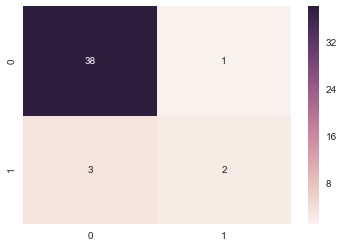

In [32]:
# Support Vector Machines - Test 01 - New features
clf =SVC(kernel = 'linear')
clf.fit(new_features_train_scaled , new_labels_train)
pred = clf.predict(new_features_test_scaled)   
clf_validation(new_labels_test, pred)

Nesta primeira verificação, foram alcançadas boas pontuações. Ambos os conjuntos de dados atingiram o objetivo, com precisão e revocação acima de 0,3. 

Passemos agora para a seleção de atributos utilizando o **Select K Best**. Neste passo também utilizaremos o GridSearchCV para testar todos os possíveis valores de **K** e escolher aquele que trás a melhor pontuação para F1.

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


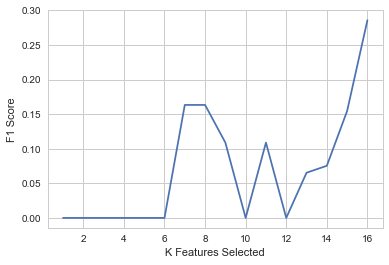

Best param: 16
Best score: 0.285777777778


In [33]:
### Classifier Pipeline
estimators = [('select', SelectKBest())
             ,('clf', SVC(kernel='linear'))]
pipeline = Pipeline(estimators)

### Parameters
param_grid = {
    'select__k': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
}

### Select K Best - Original Features
clf = GridSearchCV(pipeline, param_grid, cv = 2, scoring = f1_binary)
clf.fit(features_train_scaled , labels_train)

### Plot results
plot_grid_scores = []
for i in range(0, len(clf.grid_scores_)):
    plot_grid_scores.append(clf.grid_scores_[i][1])

plt.figure()
plt.xlabel("K Features Selected")
plt.ylabel("F1 Score")
plt.plot(range(1, len(clf.grid_scores_) + 1), plot_grid_scores)
plt.show()

print "Best param: " + str(clf.best_params_['select__k'])
print "Best score: " + str(clf.best_score_)

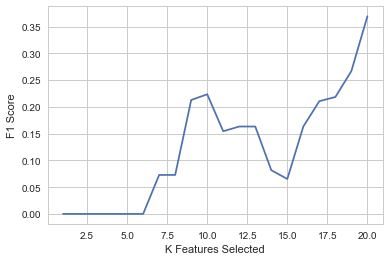

Best param: 20
Best score: 0.369431818182


In [34]:
### Parameters
param_grid = {
    'select__k': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}

### Select K Best - New Features
clf = GridSearchCV(pipeline, param_grid, cv = 2, scoring = f1_binary)
clf.fit(new_features_train_scaled , new_labels_train)

### Plot results
plot_grid_scores = []
for i in range(0, len(clf.grid_scores_)):
    plot_grid_scores.append(clf.grid_scores_[i][1])

plt.figure()
plt.xlabel("K Features Selected")
plt.ylabel("F1 Score")
plt.plot(range(1, len(clf.grid_scores_) + 1), plot_grid_scores)
plt.show()

print "Best param: " + str(clf.best_params_['select__k'])
print "Best score: " + str(clf.best_score_)

Em ambos conjuntos, a melhor pontuação F1 foi encontrada ao utilizar todos os atributos disponíveis.

In [35]:
### Select K Best - Original features
select_k_best = SelectKBest(k=16).fit(features_train_scaled, labels_train)
features_train_scaled_k = select_k_best.transform(features_train_scaled)
features_test_scaled_k = select_k_best.transform(features_test_scaled)

### Select K Best - New features
select_k_best = SelectKBest(k=20).fit(new_features_train_scaled, new_labels_train)
new_features_train_scaled_k = select_k_best.transform(new_features_train_scaled)
new_features_test_scaled_k = select_k_best.transform(new_features_test_scaled)

('Accuracy: ', 0.88636363636363635)
('Presicion: ', 0.5)
('Recall: ', 0.40000000000000002)
('F1: ', 0.44444444444444448)


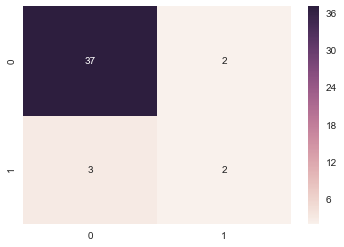

In [36]:
# Support Vector Machines - Test 02 - Original Features
clf =SVC(kernel = 'linear')
clf.fit(features_train_scaled_k , labels_train)
pred = clf.predict(features_test_scaled_k)   
clf_validation(labels_test, pred)

('Accuracy: ', 0.90909090909090906)
('Presicion: ', 0.66666666666666663)
('Recall: ', 0.40000000000000002)
('F1: ', 0.5)


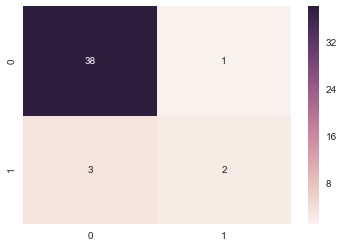

In [37]:
# Support Vector Machines - Test 02 - New Features
clf =SVC(kernel = 'linear')
clf.fit(new_features_train_scaled_k , new_labels_train)
pred = clf.predict(new_features_test_scaled_k)   
clf_validation(new_labels_test, pred)

Passemos para o ajuste fino no modelo.

In [38]:
svc_param_grid = {
    'C': [1, 1e2,1e3,1e4],
    'kernel': ['linear'],
    'gamma': [0.0025, 0.005, 0.01, 0.1, 'auto'],
    'degree': [0.05, 0.1, 0.5, 1, 3],
    'tol': [1e-5, 1e-4, 1e-3],
    'probability': [True, False],
    'shrinking': [True, False]
}

In [39]:
# Select best set of parameters - Original Features
clf = GridSearchCV(SVC(), svc_param_grid, scoring = f1_binary)
clf = clf.fit(features_train_scaled_k, labels_train)
print clf.best_estimator_

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=0.05, gamma=0.0025, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=1e-05, verbose=False)


In [40]:
# Select best set of parameters - New Features
clf = GridSearchCV(SVC(), svc_param_grid, scoring = f1_binary)
clf = clf.fit(new_features_train_scaled_k, new_labels_train)
print clf.best_estimator_

SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=0.05, gamma=0.0025, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=1e-05, verbose=False)


O ajuste fino resultou no mesmo resultado para ambos os conjuntos de atributos. Testemos, agora, nosso modelo final com o conjunto de teste oficial.

In [41]:
### Dump classifier with original features for test with tester.py
estimators = [('scale', StandardScaler())
             ,('select', SelectKBest(k=16))
             ,('clf', SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=0.05, gamma=0.0025, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=1e-05, verbose=False))]
clf = Pipeline(estimators)
dump_classifier_and_data(clf, my_dataset, org_features_list)

In [42]:
### Dump classifier with new features for test with tester.py
estimators = [('scale', StandardScaler())
             ,('select', SelectKBest(k=20))
             ,('clf', SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=0.05, gamma=0.0025, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=1e-05, verbose=False))]
clf = Pipeline(estimators)
dump_classifier_and_data(clf, my_dataset, new_features_list)

MÉTRICAS          | RESULTADO A.O.\* | RESULTADO N.A.\*\* 
------------------|------------------|------------------
Accuracy          | 0.85013          | 0.83167
Precision         | 0.38582          | 0.35228
Recall            | 0.20950          | 0.31300
F1                | 0.27155          | 0.33148
F2                | 0.23057          | 0.32014
Total predictions | 15000            | 15000
True positives    | 419              | 626
False positives   | 667              | 1151
False negatives   | 1581             | 1374
True negatives    | 12333            | 11849

\*A.O.: Atributos Originais
\*\*N.A.: Novos Atributos 

O conjunto de dados com os atributos originais chegou perto do objetivo estipulado. Apesar da alta pontuação na precisão, a revocação ficou bem abaixo do esperado. Já no conjunto de dados com os novos atributos tivemos melhores resultados, conseguimos alcançar o objetivo com precisão e revocação acima de 0,3.

**MODELO: Nearest Neighbor**

O póximo modelo que testaremos é o *Nearest Neighbor*.

('Accuracy: ', 0.84090909090909094)
('Presicion: ', 0.33333333333333331)
('Recall: ', 0.40000000000000002)
('F1: ', 0.36363636363636359)


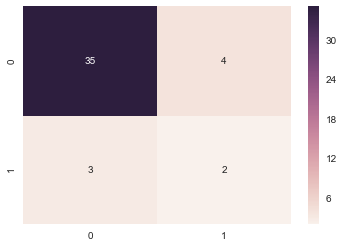

In [43]:
# Nearest Neighbor - Test 01 - Original Features
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(features_train_scaled , labels_train)
pred = clf.predict(features_test_scaled)   
clf_validation(labels_test, pred)

('Accuracy: ', 0.88636363636363635)
('Presicion: ', 0.5)
('Recall: ', 0.40000000000000002)
('F1: ', 0.44444444444444448)


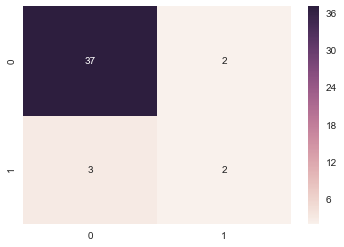

In [44]:
# Nearest Neighbor - Test 02 - New Features
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(new_features_train_scaled , new_labels_train)
pred = clf.predict(new_features_test_scaled)   
clf_validation(new_labels_test, pred)

Mais uma vez tivemos bons resultados apenas com a configuração padrão do modelo. Passemos para a seleção de atributos utilizando o *Select K Best*.

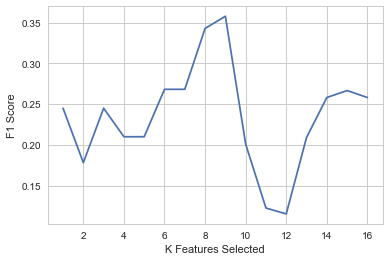

Best param: 9
Best score: 0.357884615385


In [45]:
### Classifier Pipeline
estimators = [('select', SelectKBest())
             ,('clf', KNeighborsClassifier(n_neighbors=1))]
pipeline = Pipeline(estimators)

### Parameters
param_grid = {
    'select__k': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
}

### Select K Best - Original Features
clf = GridSearchCV(pipeline, param_grid, cv = 2, scoring = f1_binary)
clf.fit(features_train_scaled , labels_train)

### Plot results
plot_grid_scores = []
for i in range(0, len(clf.grid_scores_)):
    plot_grid_scores.append(clf.grid_scores_[i][1])

plt.figure()
plt.xlabel("K Features Selected")
plt.ylabel("F1 Score")
plt.plot(range(1, len(clf.grid_scores_) + 1), plot_grid_scores)
plt.show()

print "Best param: " + str(clf.best_params_['select__k'])
print "Best score: " + str(clf.best_score_)

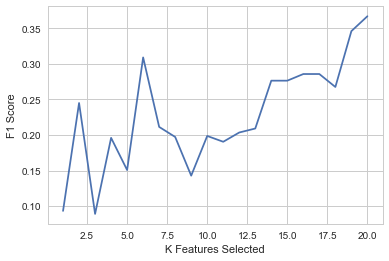

Best param: 20
Best score: 0.366923076923


In [46]:
### Parameters
param_grid = {
    'select__k': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
}

### Select K Best - New Features
clf = GridSearchCV(pipeline, param_grid, cv = 2, scoring = f1_binary)
clf.fit(new_features_train_scaled , new_labels_train)

### Plot results
plot_grid_scores = []
for i in range(0, len(clf.grid_scores_)):
    plot_grid_scores.append(clf.grid_scores_[i][1])

plt.figure()
plt.xlabel("K Features Selected")
plt.ylabel("F1 Score")
plt.plot(range(1, len(clf.grid_scores_) + 1), plot_grid_scores)
plt.show()

print "Best param: " + str(clf.best_params_['select__k'])
print "Best score: " + str(clf.best_score_)

Desta vez encontramos diferença na seleção dos melhores K atributos. O conjunto de dados com os atributos originais teve sua melhor performace com 9 atributos. Já o conjunto de dados com os novos atributos alcançou a melhor performance ao utilizar todos os atributos. Testemos os resultados.

In [47]:
### Select K Best - Original features
select_k_best = SelectKBest(k=9).fit(features_train_scaled, labels_train)
features_train_scaled_k = select_k_best.transform(features_train_scaled)
features_test_scaled_k = select_k_best.transform(features_test_scaled)

### Select K Best - New features
select_k_best = SelectKBest(k=20).fit(new_features_train_scaled, new_labels_train)
new_features_train_scaled_k = select_k_best.transform(new_features_train_scaled)
new_features_test_scaled_k = select_k_best.transform(new_features_test_scaled)

('Accuracy: ', 0.81818181818181823)
('Presicion: ', 0.20000000000000001)
('Recall: ', 0.20000000000000001)
('F1: ', 0.20000000000000004)


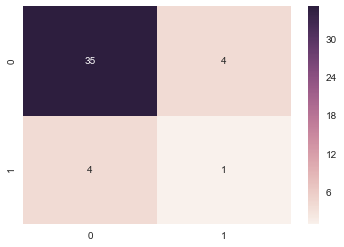

In [48]:
# Nearest Neighbor - Test 02 - Original Features
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(features_train_scaled_k , labels_train)
pred = clf.predict(features_test_scaled_k)   
clf_validation(labels_test, pred)

('Accuracy: ', 0.88636363636363635)
('Presicion: ', 0.5)
('Recall: ', 0.40000000000000002)
('F1: ', 0.44444444444444448)


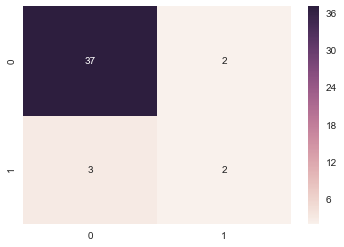

In [49]:
# Nearest Neighbor - Test 02 - New Features
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(new_features_train_scaled_k , new_labels_train)
pred = clf.predict(new_features_test_scaled_k)   
clf_validation(new_labels_test, pred)

No conjunto de dados originais tivemos uma queda na performance após a seleção de atributos. Já para conjunto de dados com os novos atributos, como não foi reduzido o número de parâmetros, a performace continua a mesma. Passemos para o ajuste dos parâmetros do modelo.

In [50]:
nn_param_grid = {
    'n_neighbors': [1,2,3,4]
   ,'weights': ['uniform', 'distance']
   ,'algorithm': ['ball_tree', 'kd_tree', 'brute']
   ,'leaf_size': [10,20,30,40,50]
   ,'metric': ['minkowski', 'l1', 'l2']
   ,'p': [1,2]
}

In [51]:
# Select best set of parameters - Original Features
clf = GridSearchCV(KNeighborsClassifier(), nn_param_grid, scoring = f1_binary)
clf = clf.fit(features_train_scaled_k, labels_train)
print clf.best_estimator_



KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')


In [52]:
# Select best set of parameters - New Features
clf = GridSearchCV(KNeighborsClassifier(), nn_param_grid, scoring = f1_binary)
clf = clf.fit(new_features_train_scaled_k, new_labels_train)
print clf.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')


Mais uma vez, o ajuste dos parâmetros teve o mesmo resultado para ambos os conjuntos de dados. Vejamos como se saem no teste.

('Accuracy: ', 0.81818181818181823)
('Presicion: ', 0.20000000000000001)
('Recall: ', 0.20000000000000001)
('F1: ', 0.20000000000000004)


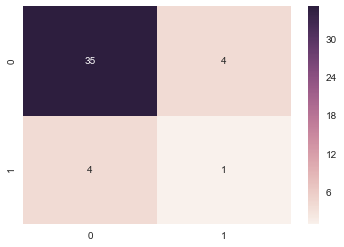

In [53]:
# Nearest Neighbor - Test 03 - Original Features
clf = KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')
clf.fit(features_train_scaled_k , labels_train)
pred = clf.predict(features_test_scaled_k)   
clf_validation(labels_test, pred)

('Accuracy: ', 0.90909090909090906)
('Presicion: ', 0.59999999999999998)
('Recall: ', 0.59999999999999998)
('F1: ', 0.59999999999999998)


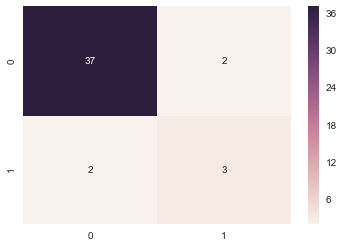

In [54]:
# Nearest Neighbor - Test 03 - New Features
clf = KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')
clf.fit(new_features_train_scaled_k , new_labels_train)
pred = clf.predict(new_features_test_scaled_k)   
clf_validation(new_labels_test, pred)

Para o conjunto de dados com os atributos orignais, não houve alteração na performance do modelo. Já para o conjunto de dados com novos atributos, houve uma melhora expressiva. Alcançamos quase o dobro do meta estipulada para precisão e revocação. Agora, vejamos os resultados do teste oficial.

In [55]:
### Dump classifier with original features for test with tester.py
estimators = [('scale', StandardScaler())
             ,('select', SelectKBest(k=9))
             ,('clf', KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform'))]
clf = Pipeline(estimators)
dump_classifier_and_data(clf, my_dataset, org_features_list)

In [56]:
### Dump classifier with new features for test with tester.py
estimators = [('scale', StandardScaler())
             ,('select', SelectKBest(k=20))
             ,('clf', KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform'))]
clf = Pipeline(estimators)
dump_classifier_and_data(clf, my_dataset, new_features_list)

MÉTRICAS          | RESULTADO A.O.\* | RESULTADO N.A.\*\* 
------------------|------------------|------------------
Accuracy          | 0.79880          | 0.88260
Precision         | 0.17703          | 0.58069
Recall            | 0.13950          | 0.43000
F1                | 0.15604          | 0.49411
F2                | 0.14568          | 0.45354
Total predictions | 15000            | 15000
True positives    | 279              | 860
False positives   | 1297             | 621
False negatives   | 1721             | 1140
True negatives    | 11703            | 12379

\*A.O.: Atributos Originais
\*\*N.A.: Novos Atributos 

Conforme esperado, o conjunto de dados com os atributos originais não alcançou um bom resultado, ficando apenas próximo de metade da meta. O conjunto de dados com novos atributos teve um resultado surpreendente, ficando bem acima da meta com precisão em 0,58 e revocação em 0,43.

**MODELO: Random Forest**

Por fim, o último modelo que testaremos é o *Random Forest.*

('Accuracy: ', 0.84090909090909094)
('Presicion: ', 0.0)
('Recall: ', 0.0)
('F1: ', 0.0)


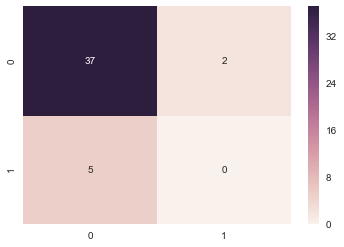

In [57]:
### Random Forest - Test 01 - Original Features
clf = RandomForestClassifier(random_state = 42)
clf.fit(features_train_scaled, labels_train)
pred = clf.predict(features_test_scaled)
clf_validation(labels_test, pred)

('Accuracy: ', 0.90909090909090906)
('Presicion: ', 1.0)
('Recall: ', 0.20000000000000001)
('F1: ', 0.33333333333333337)


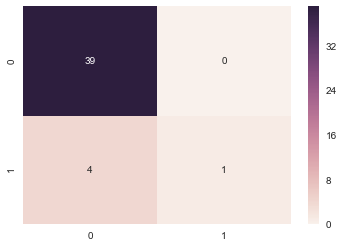

In [58]:
### Random Forest - Test 01 - New Features
clf = RandomForestClassifier(random_state = 42)
clf.fit(new_features_train_scaled , new_labels_train)
pred = clf.predict(new_features_test_scaled)   
clf_validation(new_labels_test, pred)

No primeiro teste com a configuração padrão, não foi identificado nenhum verdadeiro positivo pelo conjunto de dados com os atributos originais. Esta situação ocasionou uma pontuação nula para precisão, revocação e F1, já que seus cáculos dependem do resultado de verdadeiros positivos. No conjunto de dados com novos atributos tivemos uma classificação desbalanceada, com alta pontuação na precisão e baixa na revocação.

Para este modelo, faremos a seleção dos atributos e ajuste dos parâmetros de forma conjunta. Assim, teremos um modelo mais preciso ao testar todos os valores possíveis do *Select K Best* com as combinações de ajustes dos parâmetros.

In [64]:
### Classifier Pipeline - Original Features
estimators = [('select', SelectKBest())
             ,('clf', RandomForestClassifier())]
pipeline = Pipeline(estimators)

### Parameters
param_grid = {
    'select__k': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
   ,'clf__random_state': [42]
   ,'clf__criterion': ['gini', 'entropy']
   ,'clf__n_estimators': [10,20,40]
   ,'clf__class_weight': ['balanced', 'balanced_subsample']
   ,'clf__max_depth': [3, 6, 9]
}

### Select best parameters for original features
clf = GridSearchCV(pipeline, param_grid, cv = 2, scoring = f1_binary)
clf.fit(features_train_scaled , labels_train)
print clf.best_estimator_

Pipeline(steps=[('select', SelectKBest(k=11, score_func=<function f_classif at 0x000000000F3FD978>)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])


('Accuracy: ', 0.79545454545454541)
('Presicion: ', 0.25)
('Recall: ', 0.40000000000000002)
('F1: ', 0.30769230769230771)


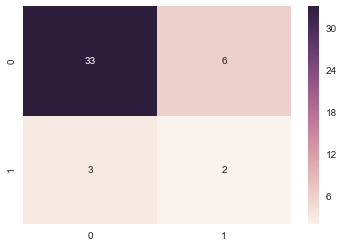

In [65]:
### Random Forest - Test 02 - Original Features
select_k_best = SelectKBest(k=11).fit(features_train_scaled, labels_train)
features_train_scaled_k = select_k_best.transform(features_train_scaled)
features_test_scaled_k = select_k_best.transform(features_test_scaled)

clf = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
clf.fit(features_train_scaled_k, labels_train)
pred = clf.predict(features_test_scaled_k)
clf_validation(labels_test, pred)

In [66]:
### Classifier Pipeline - New Features
estimators = [('select', SelectKBest())
             ,('clf', RandomForestClassifier())]
pipeline = Pipeline(estimators)

### Parameters
param_grid = {
    'select__k': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
   ,'clf__random_state': [42]
   ,'clf__criterion': ['gini', 'entropy']
   ,'clf__n_estimators': [10,20,40]
   ,'clf__class_weight': ['balanced', 'balanced_subsample']
   ,'clf__max_depth': [3, 6, 9]
}

### Select best parameters for new features
clf = GridSearchCV(pipeline, param_grid, cv = 2, scoring = f1_binary)
clf.fit(new_features_train_scaled , new_labels_train)
print clf.best_estimator_

Pipeline(steps=[('select', SelectKBest(k=12, score_func=<function f_classif at 0x000000000F3FD978>)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])


('Accuracy: ', 0.84090909090909094)
('Presicion: ', 0.375)
('Recall: ', 0.59999999999999998)
('F1: ', 0.46153846153846151)


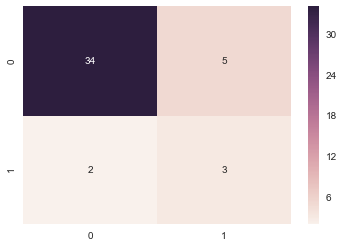

In [67]:
### Random Forest - Test 02 - New Features
select_k_best = SelectKBest(k=12).fit(new_features_train_scaled, new_labels_train)
new_features_train_scaled_k = select_k_best.transform(new_features_train_scaled)
new_features_test_scaled_k = select_k_best.transform(new_features_test_scaled)

clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
clf.fit(new_features_train_scaled_k, new_labels_train)
pred = clf.predict(new_features_test_scaled_k)
clf_validation(new_labels_test, pred)

Ao testarmos todas a combinações de **K** e os ajustes de parâmetros do *Random Forest*, encontramos valores distintos para os diferentes conjuntos de dados. Mesmo com todas as combinações, o conjunto de dados com atributos originais não tece um bom resultado na precisão, enquanto que o conjuno de dados com novos atributos alcançou a meta mas teve um resultado desiquilibrado entre revocação e precisão. Vejamos como os modelos se saem no teste oficial.

In [68]:
### Dump classifier with original features for test with tester.py
estimators = [('scale', StandardScaler())
             ,('select', SelectKBest(k=11))
             ,('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]
clf = Pipeline(estimators)
dump_classifier_and_data(clf, my_dataset, org_features_list)

In [69]:
### Dump classifier with original features for test with tester.py
estimators = [('scale', StandardScaler())
             ,('select', SelectKBest(k=12))
             ,('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]
clf = Pipeline(estimators)
dump_classifier_and_data(clf, my_dataset, new_features_list)

MÉTRICAS          | RESULTADO A.O.\* | RESULTADO N.A.\*\* 
------------------|------------------|------------------
Accuracy          | 0.79880          | 0.80693
Precision         | 0.17703          | 0.29910
Recall            | 0.13950          | 0.33350
F1                | 0.15604          | 0.31537
F2                | 0.14568          | 0.32600
Total predictions | 15000            | 15000
True positives    | 279              | 667
False positives   | 1297             | 1563
False negatives   | 1721             | 1333
True negatives    | 11703            | 11437

\*A.O.: Atributos Originais
\*\*N.A.: Novos Atributos 

Desta vez, nenhum dos nossos conjuntos de dados alcançou a meta. Faltou para o conjunto de dados com novos atributos um pouco mais de precisão.

**MODELO FINAL**

Após todos os testes, pudemos observar que o conjunto de dados com novos atributos sempre obteve resultados melhores que o conjunto de dados com os atributos originais. Portanto, fizemos uma boa escolha ao transformar as quantidades em percentuais do total.

Para o nosso modelo, encontramos no *Nearest Neighbor* a melhor performance e equilibrio entre precisão e revocação ao utilizar todos os atributos disponíveis.

In [50]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

estimators = [('scale', StandardScaler())
             ,('select', SelectKBest(k=20))
             ,('clf', KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform'))]

clf = Pipeline(estimators)

features_list = ['poi'
                ,'bonus'
                ,'deferral_payments'
                ,'deferred_income'
                ,'exercised_stock_options'
                ,'expenses'
                ,'long_term_incentive'
                ,'other'
                ,'restricted_stock'
                ,'salary'
                ,'total_payments'
                ,'total_stock_value'
                ,'from_messages'
                ,'from_poi_to_this_person'
                ,'from_this_person_to_poi'
                ,'shared_receipt_with_poi'
                ,'to_messages'
                ,'perc_exercised_stock'
                ,'perc_bonus'
                ,'perc_message_from_poi'
                ,'perc_message_to_poi']

dump_classifier_and_data(clf, my_dataset, features_list)

#### 8. Referências

https://en.wikipedia.org/wiki/Enron 

https://pt.wikipedia.org/wiki/Precis%C3%A3o_e_revoca%C3%A7%C3%A3o

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html

https://pandas.pydata.org/pandas-docs/stable/missing_data.html

https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string

http://seaborn.pydata.org/generated/seaborn.PairGrid.html

https://seaborn.pydata.org/generated/seaborn.boxplot.html

http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.decomposition.RandomizedPCA.html

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

https://machinelearningmastery.com/difference-test-validation-datasets/

https://developers.google.com/machine-learning/glossary/

https://en.wikipedia.org/wiki/Training,_test,_and_validation_sets